In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model

In [6]:
df=pd.read_csv('counterfeit_train.csv')
df

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535,Area046,1995,204.1452,Hreplacements,mild,0.112963,DownTown,Tier 1,Small,2070.4520
6814,ACW12,20.650,Area046,1995,235.1088,Hreplacements,mild,0.131103,DownTown,Tier 1,Small,2126.3792
6815,OPM10,20.000,Area017,2005,193.6292,Antimalarial,critical,0.105096,DownTown,Tier 2,Unknown,2119.7212
6816,SLY12,10.180,Area045,2000,162.8682,Statins,mild,0.099957,DownTown,Tier 2,Unknown,1485.2138


In [7]:
df.describe(include="all")

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
count,6818,5652.000000,6818,6818.000000,6818.000000,6818,6818,6818.000000,6818,6818,6818,6818.000000
unique,1557,NaN,10,NaN,NaN,16,2,NaN,4,3,4,NaN
top,RQS74,NaN,Area017,NaN,NaN,Hreplacements,mild,NaN,DownTown,Tier 3,Medium,NaN
freq,9,NaN,760,NaN,NaN,976,4434,NaN,4481,2655,2203,NaN
mean,NaN,14.115057,NaN,1995.836316,151.401518,NaN,NaN,0.079174,NaN,NaN,NaN,2280.583480
std,NaN,4.649668,NaN,8.368979,62.203961,NaN,NaN,0.051481,NaN,NaN,NaN,1693.354404
min,NaN,5.855000,NaN,1983.000000,41.790000,NaN,NaN,0.013000,NaN,NaN,NaN,146.290000
25%,NaN,9.995000,NaN,1985.000000,104.509400,NaN,NaN,0.040058,NaN,NaN,NaN,933.265600
50%,NaN,13.800000,NaN,1997.000000,153.195700,NaN,NaN,0.066955,NaN,NaN,NaN,1902.670400
75%,NaN,18.050000,NaN,2002.000000,196.148350,NaN,NaN,0.107697,NaN,NaN,NaN,3207.638400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


## Checking the percentage of Null values

In [9]:
df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing'])  #It will tell the  
df_missing.sort_values(by=['missing'], ascending=False).head(20)     

,missing
Counterfeit_Weight,17.1
Medicine_ID,0.0
DistArea_ID,0.0
Active_Since,0.0
Medicine_MRP,0.0
Medicine_Type,0.0
SidEffect_Level,0.0
Availability_rating,0.0
Area_Type,0.0
Area_City_Type,0.0


In [10]:
df['Counterfeit_Weight'] = df['Counterfeit_Weight'].fillna('NoPool')

In [11]:
df.isna().sum()

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
Counterfeit_Sales      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   6818 non-null   object 
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 639.3+ KB


In [13]:
df.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

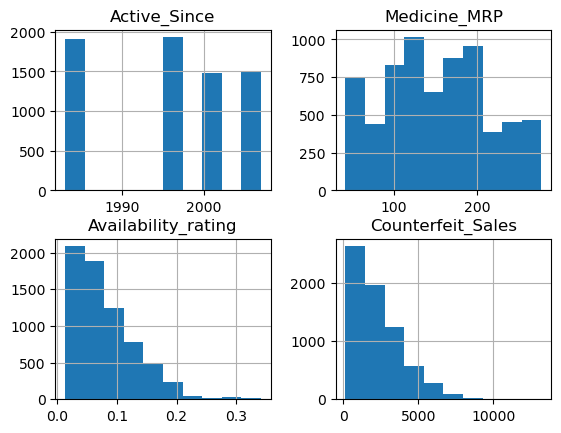

In [14]:
viz = df[['Medicine_ID','Counterfeit_Weight','Active_Since','Medicine_MRP','Availability_rating', 'Counterfeit_Sales']]
viz.hist()
plt.show()

In [ ]:

for i in df[['Medicine_ID','Counterfeit_Weight','Active_Since','Medicine_MRP','Availability_rating', 'Counterfeit_Sales']]:
    plt.scatter(df[i],df['Counterfeit_Sales'],color='blue')
    plt.xlabel(i)
    plt.ylabel("")
    plt.show()